<a href="https://colab.research.google.com/github/hailongdang1027/4.1.1/blob/main/KmeansDang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

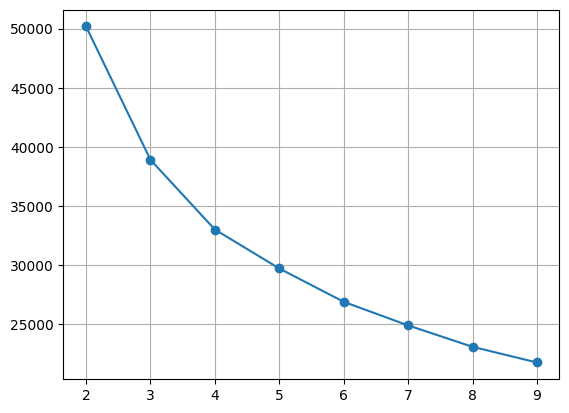

In [13]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


# Đọc file CSV
df = pd.read_csv('players_20.csv')
df = df[['age', 'height_cm', 'weight_kg', 'overall']]

# Chọn các cột số
numeric_df = df.select_dtypes(include=[np.number])

# Xử lý thiếu dữ liệu nếu có
numeric_df = numeric_df.dropna()

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# Áp dụng KMeans
models = []
scores1 = []
scores2 = []

for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(scaled_data)
    models.append(kmeans)
    scores1.append(kmeans.inertia_)
    scores2.append(silhouette_score(scaled_data, kmeans.labels_))

# Vẽ biểu đồ
plt.grid()
plt.plot(np.arange(2, 10), scores1, marker = 'o')
plt.show()


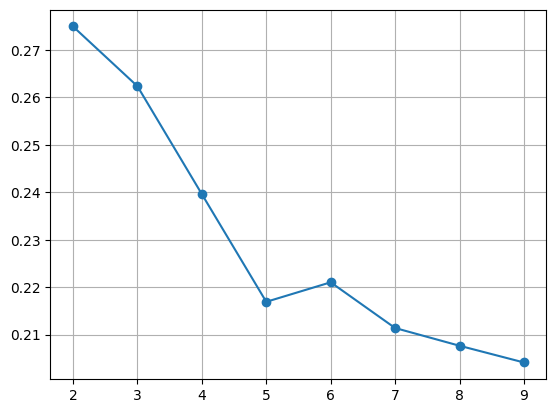

In [14]:
plt.grid()
plt.plot(np.arange(2, 10), scores2, marker = 'o')
plt.show()

In [16]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(df)
kmeans.cluster_centers_
labels = kmeans.labels_
df['Cluster'] = labels
fig = go.Figure(data=[go.Scatter3d(x=df['age'], y=df['height_cm'], z=df['weight_kg'], mode='markers', marker_color=df['Cluster'], marker_size=4)])
fig.show()

In [17]:
model = DBSCAN(eps=11, min_samples=5).fit(df)
df['Cluster'] = model.labels_
fig = go.Figure(data=[go.Scatter3d(x=df['age'], y=df['height_cm'], z=df['weight_kg'], mode='markers', marker_color=df['Cluster'], marker_size=4)])
fig.show()

In [22]:
from sklearn_extra.cluster import KMedoids
kmedoids = KMedoids(n_clusters=5, random_state=0).fit(scaled_data)
df['Cluster'] = kmedoids.labels_

# Create a 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=df['age'],
    y=df['height_cm'],
    z=df['weight_kg'],
    mode='markers',
    marker=dict(color=df['Cluster'], size=4, colorscale='Viridis', opacity=0.8)
)])
fig.update_layout(title='3D Scatter Plot of KMedoids Clustering',
                  scene=dict(xaxis_title='Age', yaxis_title='Height (cm)', zaxis_title='Weight (kg)'))
fig.show()

In [21]:
pip install scikit-learn-extra


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.9 MB/s eta 0:00:00


In [1]:
from google.colab import files
uploaded = files.upload()


Saving players_20.csv to players_20.csv


In [2]:
import pandas as pd
df = pd.read_csv('players_20.csv')
df = df[['age', 'height_cm', 'weight_kg', 'overall']]

df.head()

,age,height_cm,weight_kg,overall
0,32,170,72,94
1,34,187,83,93
2,27,175,68,92
3,26,188,87,91
4,28,175,74,91
